In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
data = pd.read_csv("train.csv" , parse_dates=['Tarih'] )
# data.set_index('Tarih' , drop= True , inplace=True)
data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [3]:
future_data = pd.read_csv("future.csv", parse_dates=['Tarih']).drop('Unnamed: 0' , axis = 1)
future_data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,NaN
1,2022-08-01 01:00:00,NaN
2,2022-08-01 02:00:00,NaN
3,2022-08-01 03:00:00,NaN
4,2022-08-01 04:00:00,NaN


In [4]:
med = pd.read_csv('med.csv')
med['Tarih'] = pd.to_datetime(med['Tarih'])
med.head()

,Tarih
0,2019-12-23
1,2019-06-12
2,2019-01-25
3,2019-09-25
4,2019-03-29


# Describe the Data

In [5]:
data.shape

(40152, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tarih                   40152 non-null  datetime64[ns]
 1   Dağıtılan Enerji (MWh)  40152 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 627.5 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dağıtılan Enerji (MWh),40152.0,1836.805287,426.066085,870.18328,1499.165048,1813.409221,2129.407998,3633.105297


# Plot the Data

# Feature Engineering

In [8]:
from feat_engs import create_datetimes, create_businessDay_cumulativeholidays ,create_electricOutage_timeofDay , create_holiday_weekend , create_hourly_sin_cos , create_outage_rolling_percentages , create_seasons

all_data = [data, future_data]
for df in all_data :
    create_datetimes(df)
    create_holiday_weekend(df)
    create_businessDay_cumulativeholidays(df)
    create_electricOutage_timeofDay(df , med)
    create_hourly_sin_cos(df)
    create_outage_rolling_percentages(df)
    # create_seasons(df)
    df.set_index('Tarih' , inplace=True)
    df.drop('date' , axis = 1 ,inplace=True)

# Train | Test Split

In [9]:
data

,Dağıtılan Enerji (MWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,holiday,weekend,business_day,cumulative_holidays,electrical_outage,timeofday,hour_sin,hour_cos,outage_percentage,rolling_outages_24h,exp_avg_outages_24h
Tarih,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1593.944216,0,0,1,1,2018,1,1,1,1,0,1,1,0,3,0.000000,1.000000,0.000000,0.0,0.000000e+00
2018-01-01 01:00:00,1513.933887,1,0,1,1,2018,1,1,1,1,0,1,2,0,3,0.258819,0.965926,0.000000,0.0,0.000000e+00
2018-01-01 02:00:00,1402.612637,2,0,1,1,2018,1,1,1,1,0,1,3,0,3,0.500000,0.866025,0.000000,0.0,0.000000e+00
2018-01-01 03:00:00,1278.527266,3,0,1,1,2018,1,1,1,1,0,1,4,0,3,0.707107,0.707107,0.000000,0.0,0.000000e+00
2018-01-01 04:00:00,1220.697701,4,0,1,1,2018,1,1,1,1,0,1,5,0,3,0.866025,0.500000,0.000000,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 19:00:00,2492.489498,19,6,3,7,2022,212,31,30,0,1,0,1632,0,3,-0.965926,0.258819,1.793365,0.0,1.866555e-256
2022-07-31 20:00:00,2479.958245,20,6,3,7,2022,212,31,30,0,1,0,1632,0,3,-0.866025,0.500000,1.793320,0.0,1.679900e-256
2022-07-31 21:00:00,2485.016884,21,6,3,7,2022,212,31,30,0,1,0,1632,0,3,-0.707107,0.707107,1.793275,0.0,1.511910e-256


In [10]:
# # Tüm feature'ları içeren data değişkeni
# X_all_temp = data[['Dağıtılan Enerji (MWh)', 'feature_1', 'feature_2', ...]]

# # Target label olarak 'Dağıtılan Enerji (MWh)' feature'ını kullanın
# y_all_temp = data['Dağıtılan Enerji (MWh)']

In [11]:
X_all_temp = data.copy()
X_test_temp = data.loc[data.index > '2022-02-23 23:00:00'].copy()
X_train_temp = data.loc[data.index <= '2022-02-23 23:00:00'].copy()

In [12]:
print(f"X_all Full data shape : {X_all_temp.shape}")
print(f"X_train Shape : {X_train_temp.shape}")
print(f"X_test Shape : {X_test_temp.shape}")

X_all Full data shape : (40152, 20)
X_train Shape : (36360, 20)
X_test Shape : (3792, 20)


# Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_all_scaled = scaler.fit_transform(X_all_temp)
X_train_scaled = scaler.transform(X_train_temp)
X_test_scaled = scaler.transform(X_test_temp)

future_data_scaled = scaler.transform(future_data)

# Reshape and Sequence

Critical Point !

In [14]:
# Target label + Multi features and Overlapping

def packager(X_all_scaled, future_data_scaled, X_train_scaled, X_test_scaled, window_size=24):
    X_data, y_data,X_future, y_future, X_train, y_train, X_test, y_test = [], [], [], [], [], [], [], []

    for i in range(window_size, len(X_all_scaled)):
        X_data.append(X_all_scaled[i-window_size:i, :])
        y_data.append(X_all_scaled[i, 0])
        
    for i in range(window_size, len(future_data_scaled)):
        X_future.append(future_data_scaled[i-window_size:i, :])
        y_future.append(future_data_scaled[i, 0])

    for i in range(window_size, len(X_train_scaled)):
        X_train.append(X_train_scaled[i-window_size:i, :])
        y_train.append(X_train_scaled[i, 0])

    for i in range(window_size, len(X_test_scaled)):
        X_test.append(X_test_scaled[i-window_size:i, :])
        y_test.append(X_test_scaled[i, 0])

    X_data, y_data = np.array(X_data), np.array(y_data)
    X_future, y_future = np.array(X_future), np.array(y_future)
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)

    return X_data, y_data, X_future, y_future, X_train, y_train, X_test, y_test

In [15]:
X_data , y_data , X_future , y_future , X_train, y_train, X_test, y_test = packager(X_all_scaled , future_data_scaled, X_train_scaled, X_test_scaled, 24)

In [16]:
print(f"X_data Shape : {X_data.shape}")
print(f"y_data Shape : {y_data.shape}\n\n")
print(f"X_train Shape : {X_train.shape}")
print(f"y_train Shape : {y_train.shape}\n\n")
print(f"X_test Shape : {X_test.shape}")
print(f"y_test Shape : {y_test.shape}\n\n")
print(f"X_future Shape : {X_future.shape}")
print(f"y_future Shape : {y_future.shape}")

X_data Shape : (40128, 24, 20)
y_data Shape : (40128,)


X_train Shape : (36336, 24, 20)
y_train Shape : (36336,)


X_test Shape : (3768, 24, 20)
y_test Shape : (3768,)


X_future Shape : (720, 24, 20)
y_future Shape : (720,)


# Final Model

In [17]:
import tensorflow as tf

# Seed ayarlamak
seed_value = 53
tf.keras.utils.set_random_seed(seed_value)

## Manual Modelling

In [18]:
print(f"""
      Model eğitiminde kullandığımız dataların shapeleri
      X_data : {X_data.shape}
      y_data : {y_data.shape}
      X_test : {X_test.shape}
      y_test : {y_test.shape}
      """)


      Model eğitiminde kullandığımız dataların shapeleri
      X_data : (40128, 24, 20)
      y_data : (40128,)
      X_test : (3768, 24, 20)
      y_test : (3768,)
      


In [19]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense , BatchNormalization , Dropout
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
# from keras.optimizers import Adam
# from keras.losses import MeanAbsolutePercentageError


# # Model oluşturma
# model = Sequential()
# model.add(LSTM(32, activation='tanh' , input_shape = (X_data.shape[1],X_data.shape[2]) ,return_sequences=True))
# model.add(LSTM(16, activation='tanh'  , return_sequences=False))
# model.add(Dense(1))

# opt = Adam(learning_rate = 0.001)
# model.compile(loss= MeanAbsolutePercentageError(), optimizer=opt)


# reduce_lr = ReduceLROnPlateau(factor = 0.1 , patience=3)
# early_stop = EarlyStopping(monitor='val_loss' , patience=5)
# model_check = ModelCheckpoint(filepath=r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Multi_Features\\32-16\\model-{epoch:03d}-{val_loss:.5f}.h5', monitor="val_loss", verbose=1)

# # # Modeli eğitme
# history = model.fit(X_data, y_data, epochs=10, batch_size= 1, validation_split=0.1, callbacks= [reduce_lr , early_stop, model_check] , shuffle=False)


# # Modeli değerlendirme
# mape_score = model.evaluate(X_test, y_test)
# print('Test MAPE: %.3f' % mape_score)

### Plot the Model History

In [20]:
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')

# plt.show()

## Import the Model

In [21]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Multi_Features\\32-16\\model-010-12.69445.h5")

# Eval Metric

In [22]:
from eval_metrics import eval_metrics

y_pred = model.predict(X_test)

eval_metrics(y_test , y_pred)

118/118 [==============================] - 1s 2ms/step

          Mape Score : 0.1296338599376747
          R2 Score : 0.9072018217903198
          MAE Score : 0.03502479077574159
          MSE Score : 0.046846168908693676
          


# Prediction

In [23]:
print(f"""
      Model eğitiminde kullandığımız dataların shapeleri
      X_data : {X_data.shape}
      y_data : {y_data.shape}
      X_test : {X_test.shape}
      y_test : {y_test.shape}
      """)


print(f"Modelin tahminlerinin alacağı future_data shape'i : {future_data.shape}")


      Model eğitiminde kullandığımız dataların shapeleri
      X_data : (40128, 24, 20)
      y_data : (40128,)
      X_test : (3768, 24, 20)
      y_test : (3768,)
      
Modelin tahminlerinin alacağı future_data shape'i : (744, 20)


In [24]:
future_data

,Dağıtılan Enerji (MWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,holiday,weekend,business_day,cumulative_holidays,electrical_outage,timeofday,hour_sin,hour_cos,outage_percentage,rolling_outages_24h,exp_avg_outages_24h
Tarih,,,,,,,,,,,,,,,,,,,,
2022-08-01 00:00:00,NaN,0,0,3,8,2022,213,1,31,0,0,1,0,0,3,0.000000,1.000000,0.0,0.0,0.0
2022-08-01 01:00:00,NaN,1,0,3,8,2022,213,1,31,0,0,1,0,0,3,0.258819,0.965926,0.0,0.0,0.0
2022-08-01 02:00:00,NaN,2,0,3,8,2022,213,1,31,0,0,1,0,0,3,0.500000,0.866025,0.0,0.0,0.0
2022-08-01 03:00:00,NaN,3,0,3,8,2022,213,1,31,0,0,1,0,0,3,0.707107,0.707107,0.0,0.0,0.0
2022-08-01 04:00:00,NaN,4,0,3,8,2022,213,1,31,0,0,1,0,0,3,0.866025,0.500000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 19:00:00,NaN,19,2,3,8,2022,243,31,35,0,0,1,24,0,3,-0.965926,0.258819,0.0,0.0,0.0
2022-08-31 20:00:00,NaN,20,2,3,8,2022,243,31,35,0,0,1,24,0,3,-0.866025,0.500000,0.0,0.0,0.0
2022-08-31 21:00:00,NaN,21,2,3,8,2022,243,31,35,0,0,1,24,0,3,-0.707107,0.707107,0.0,0.0,0.0


In [25]:
future_data_scaled.shape

(744, 20)

In [26]:
# Son 744 saatlik verileri tahmin etme
last_window = X_data[-1:,:,:]

# # Last window'ı ölçeklendirin
# last_window_scaled = scaler.transform(last_window.reshape(-1, last_window.shape[-1])).reshape(last_window.shape)

# Tahminler için bir dizi oluşturalım
forecasts = []

# Son 24 saatlik verilerle başlayalım
current_window = last_window.reshape((1, last_window.shape[1], last_window.shape[2]))

for i in range(744):
    # Bu sıradaki tahminimizi yapalım
    predicted_value = model.predict(current_window , verbose=0)[0,0]
    # Tahminler dizimize bu tahminimizi ekleyelim
    forecasts.append(predicted_value)
    # Şimdi tahminimizi ve son 23 saatlik verileri birleştirerek yeni bir pencere oluşturalım.
    current_window = np.insert(current_window[0], current_window.shape[1], predicted_value, axis=0)
    current_window = current_window[1:]
    current_window = current_window.reshape((1, current_window.shape[0], current_window.shape[1]))

# Tahminleri geri ölçeklendirin ve future_data'yı güncelleyin
future_data_scaled[:,0] = forecasts
future_data_scaled = scaler.inverse_transform(future_data_scaled.reshape(-1, 20)).reshape(-1, 24, 20)
predictions = future_data_scaled[:, :, 0].reshape(-1)

predictions

array([2034.37802598, 2288.4981998 , 2203.3442511 , 2159.81590314,
       2175.41302869, 2708.77576576, 2709.43943819, 2581.80304317,
       2479.44268679, 2365.4919419 , 2337.17486725, 2352.88727088,
       2482.24575588, 2510.72487859, 2528.07571324, 2105.17968782,
       2115.81837336, 2137.72236319, 2156.30848492, 2172.90342467,
       2190.97178309, 2213.63891388, 2234.71619513, 2241.13158551,
       2250.3217195 , 2248.53457975, 2249.89914296, 2251.7929973 ,
       2256.3090988 , 2256.71323085, 2257.03518609, 2256.54426611,
       2256.1213602 , 2256.39078156, 2257.13070222, 2258.56031521,
       2258.06626626, 2253.06616146, 2248.80482453, 2250.77410367,
       2251.46923055, 2252.26563746, 2252.82802986, 2253.49022014,
       2254.0132533 , 2254.4168913 , 2254.57086989, 2254.64003675,
       2254.52640549, 2254.53645115, 2254.5833858 , 2254.41573852,
       2254.50022089, 2254.41870281, 2254.73835249, 2254.62735616,
       2254.56477662, 2254.55324881, 2254.70360438, 2254.72254

# Visualize the Predictions

In [27]:
from eval_metrics import preds_plot

In [28]:
anomaly_data = data[20900:21500][['Dağıtılan Enerji (MWh)']]

In [29]:
future_data['Dağıtılan Enerji (MWh)'] = predictions
future_data = future_data[['Dağıtılan Enerji (MWh)']]
future_data

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2034.378026
2022-08-01 01:00:00,2288.498200
2022-08-01 02:00:00,2203.344251
2022-08-01 03:00:00,2159.815903
2022-08-01 04:00:00,2175.413029
...,...
2022-08-31 19:00:00,2254.701793
2022-08-31 20:00:00,2254.701793
2022-08-31 21:00:00,2254.701793


In [30]:
target_data = data[data.index.month == 8]
target_data = target_data[['Dağıtılan Enerji (MWh)']]
target_data

,Dağıtılan Enerji (MWh)
Tarih,
2018-08-01 00:00:00,2106.796778
2018-08-01 01:00:00,1936.871633
2018-08-01 02:00:00,1808.523094
2018-08-01 03:00:00,1725.237068
2018-08-01 04:00:00,1680.685169
...,...
2021-08-31 19:00:00,2538.809761
2021-08-31 20:00:00,2572.939106
2021-08-31 21:00:00,2484.682803


In [31]:
data = data[['Dağıtılan Enerji (MWh)']]
data

,Dağıtılan Enerji (MWh)
Tarih,
2018-01-01 00:00:00,1593.944216
2018-01-01 01:00:00,1513.933887
2018-01-01 02:00:00,1402.612637
2018-01-01 03:00:00,1278.527266
2018-01-01 04:00:00,1220.697701
...,...
2022-07-31 19:00:00,2492.489498
2022-07-31 20:00:00,2479.958245
2022-07-31 21:00:00,2485.016884


In [32]:
print(f'Normal all data mean : {data.mean().values}\n')
print(f'Anomaly data mean : {anomaly_data.mean().values}\n')
print(f'Target data mean : {target_data.mean().values}\n')
print(f'Future data mean : {future_data.mean().values}\n')

Normal all data mean : [1836.80528683]

Anomaly data mean : [1525.56498328]

Target data mean : [2209.59026741]

Future data mean : [2256.51907913]



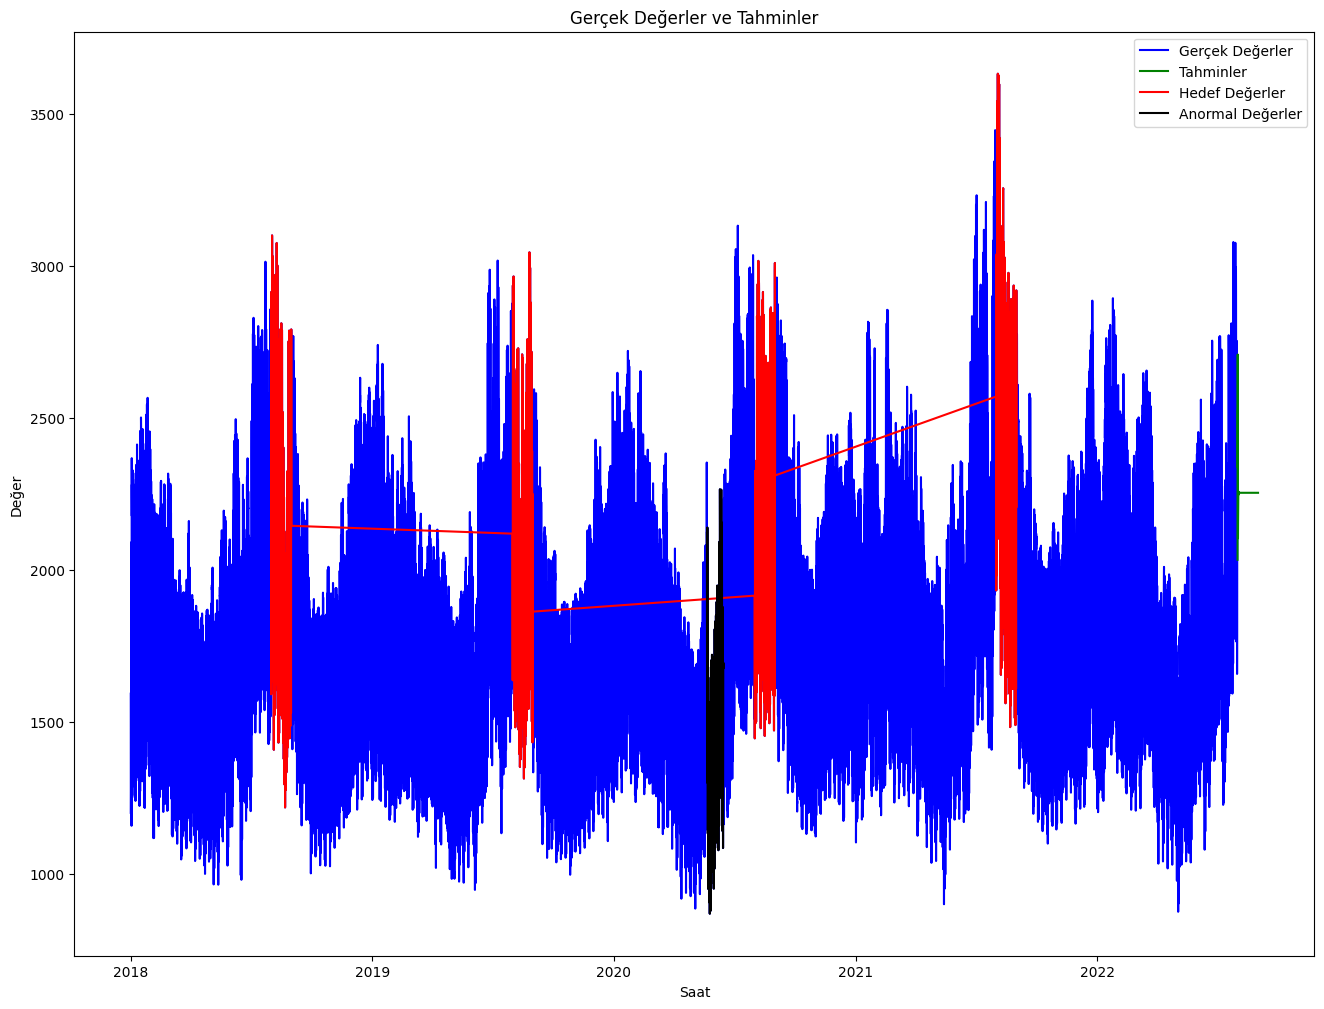

In [33]:
plt.figure(figsize=(16,12) , dpi = 100)
preds_plot(data , future_data , target_data , anomaly_data)

In [ ]:
# Done